# Attributes Engineering

In this notebook, we've performed the following tasks:
* Attributes selection.
* Data cleaning.
* Attributes transformation.

---

## Imports

In [852]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

---

## Loading Data
Our data comes from 2025's [Stack Overflow Annual Developer Survey](https://survey.stackoverflow.co/).

In [853]:
# Load to DataFrame
df = pd.read_csv("../data/raw/survey_results_public.csv")

In [854]:
df.head()

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


---

## Attributes selection

The dataset has 172 columns. However, we're going to select the following:

In [855]:
df_as = df[["Age", "MainBranch", "RemoteWork",
               "Industry", "OrgSize", "LanguageHaveWorkedWith",
               "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith",
               "WebframeHaveWorkedWith", "AIAgents", "Country",
               "DevType", "EdLevel", "YearsCode", "Employment",
               "ConvertedCompYearly"]].copy()
df_as.head()

,Age,MainBranch,RemoteWork,Industry,OrgSize,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,AIAgents,Country,DevType,EdLevel,YearsCode,Employment,ConvertedCompYearly
0,25-34 years old,I am a developer by profession,Remote,Fintech,20 to 99 employees,Bash/Shell (all shells);Dart;SQL,Cloud Firestore;PostgreSQL,Amazon Web Services (AWS);Cloudflare;Firebase;...,NaN,"Yes, I use AI agents at work monthly or infreq...",Ukraine,"Developer, mobile","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14.0,Employed,61256.0
1,25-34 years old,I am a developer by profession,"Hybrid (some in-person, leans heavy to flexibi...",Retail and Consumer Services,500 to 999 employees,Java,Dynamodb;MongoDB,Amazon Web Services (AWS);Datadog;Docker;Homeb...,Spring Boot,"No, and I don't plan to",Netherlands,"Developer, back-end","Associate degree (A.A., A.S., etc.)",10.0,Employed,104413.0
2,35-44 years old,I am a developer by profession,NaN,Software Development,NaN,Dart;HTML/CSS;JavaScript;TypeScript,MongoDB;MySQL;PostgreSQL,Datadog;Firebase;npm;pnpm,Next.js;Node.js;React,"Yes, I use AI agents at work weekly",Ukraine,"Developer, front-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12.0,"Independent contractor, freelancer, or self-em...",53061.0
3,35-44 years old,I am a developer by profession,Remote,Retail and Consumer Services,"10,000 or more employees",Java;Kotlin;SQL,NaN,Amazon Web Services (AWS);Google Cloud,Spring Boot,"Yes, I use AI agents at work monthly or infreq...",Ukraine,"Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5.0,Employed,36197.0
4,35-44 years old,I am a developer by profession,NaN,Software Development,NaN,C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Lua;P...,Elasticsearch;Microsoft SQL Server;MySQL;Oracl...,Amazon Web Services (AWS);APT;Docker;Make;Mave...,Angular;ASP.NET;ASP.NET Core;Flask;jQuery,"No, and I don't plan to",Ukraine,Engineering manager,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",22.0,"Independent contractor, freelancer, or self-em...",60000.0


In [856]:
df_as.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49191 entries, 0 to 49190
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     49191 non-null  object 
 1   MainBranch              49191 non-null  object 
 2   RemoteWork              33780 non-null  object 
 3   Industry                33642 non-null  object 
 4   OrgSize                 34178 non-null  object 
 5   LanguageHaveWorkedWith  31671 non-null  object 
 6   DatabaseHaveWorkedWith  25550 non-null  object 
 7   PlatformHaveWorkedWith  24258 non-null  object 
 8   WebframeHaveWorkedWith  22992 non-null  object 
 9   AIAgents                31919 non-null  object 
 10  Country                 35437 non-null  object 
 11  DevType                 43680 non-null  object 
 12  EdLevel                 48149 non-null  object 
 13  YearsCode               43042 non-null  float64
 14  Employment              48339 non-null

---

## Data cleaning

#### Cleaning `ConvertedCompYearly` column

In [857]:
df_ccy_1 = df_as.copy()
df_ccy_1["ConvertedCompYearly"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 49191 entries, 0 to 49190
Series name: ConvertedCompYearly
Non-Null Count  Dtype  
--------------  -----  
23947 non-null  float64
dtypes: float64(1)
memory usage: 384.4 KB


In [858]:
# Keep only not null values
df_ccy_2 = df_ccy_1[df_ccy_1["ConvertedCompYearly"].notnull()].copy()
df_ccy_2["ConvertedCompYearly"].info()

<class 'pandas.core.series.Series'>
Index: 23947 entries, 0 to 49122
Series name: ConvertedCompYearly
Non-Null Count  Dtype  
--------------  -----  
23947 non-null  float64
dtypes: float64(1)
memory usage: 374.2 KB


Let's also explore `ConvertedCompYearly` distribution

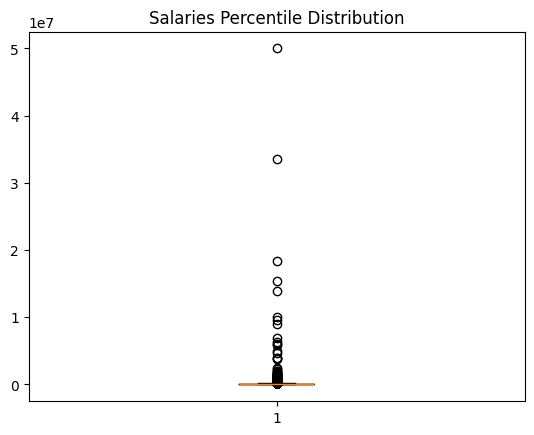

In [859]:
plt.title("Salaries Percentile Distribution")
plt.boxplot(df_ccy_2["ConvertedCompYearly"])
plt.show()

Let's remove those outliers using Modified Z-Score.

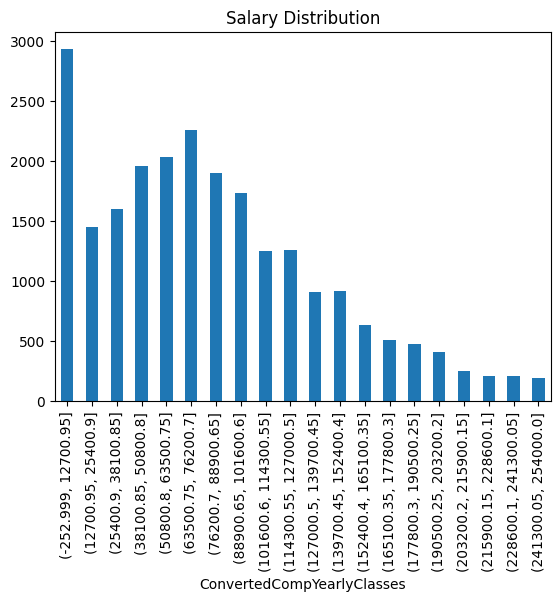

In [860]:
# Calculate Modified Z-Score
x = df_ccy_2["ConvertedCompYearly"]
median = np.median(x)
mad = stats.median_abs_deviation(x, scale='normal')
mod_z = 0.6745 * (x - median) / mad

# Remove outliers
df_ccy_3 = df_ccy_2[mod_z.abs() <= 2] # Defining a low Z-Score because this dataset is small

# Plot result
plt.title("Salary Distribution")
df_ccy_3["ConvertedCompYearlyClasses"] = pd.cut(df_ccy_3["ConvertedCompYearly"], bins=20)
df_ccy_3["ConvertedCompYearlyClasses"].value_counts().sort_index().plot(kind="bar")
df_ccy_3.drop(columns=["ConvertedCompYearlyClasses"], axis=1, inplace=True)
df_ccy_final = df_ccy_3.copy()

In [861]:
df_ccy_final = df_ccy_3.copy()

#### Cleaning `Age` column

In [862]:
df_age_1 = df_ccy_final.copy()
df_age_1["Age"].info()

<class 'pandas.core.series.Series'>
Index: 23072 entries, 0 to 49122
Series name: Age
Non-Null Count  Dtype 
--------------  ----- 
23072 non-null  object
dtypes: object(1)
memory usage: 360.5+ KB


In [863]:
df_age_1["Age"].unique()

array(['25-34 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '65 years or older', '55-64 years old',
       'Prefer not to say'], dtype=object)

In [864]:
df_age_1["Age"].value_counts()

Age
25-34 years old      8378
35-44 years old      7221
45-54 years old      3249
18-24 years old      2573
55-64 years old      1316
65 years or older     315
Prefer not to say      20
Name: count, dtype: int64

In [865]:
df_age_2 = df_age_1.loc[df_age_1["Age"] != 'Prefer not to say'].copy()
df_age_2["Age"].value_counts()

Age
25-34 years old      8378
35-44 years old      7221
45-54 years old      3249
18-24 years old      2573
55-64 years old      1316
65 years or older     315
Name: count, dtype: int64

In [866]:
df_age_final = df_age_2.copy()

#### Cleaning `MainBranch` column

In [867]:
df_mb_1 = df_age_final.copy()
df_mb_1["MainBranch"].info()

<class 'pandas.core.series.Series'>
Index: 23052 entries, 0 to 49122
Series name: MainBranch
Non-Null Count  Dtype 
--------------  ----- 
23052 non-null  object
dtypes: object(1)
memory usage: 360.2+ KB


In [868]:
df_mb_1["MainBranch"].value_counts()

MainBranch
I am a developer by profession                                                                19443
I am not primarily a developer, but I write code sometimes as part of my work/studies          2116
I used to be a developer by profession, but no longer am                                        461
I work with developers or my work supports developers but am not a developer by profession      371
I am learning to code                                                                           360
I code primarily as a hobby                                                                     301
Name: count, dtype: int64

In [869]:
df_mb_final = df_mb_1.copy()

#### Cleaning `RemoteWork` column

In [870]:
df_rw_1 = df_mb_final.copy()
df_rw_1["RemoteWork"].info()

<class 'pandas.core.series.Series'>
Index: 23052 entries, 0 to 49122
Series name: RemoteWork
Non-Null Count  Dtype 
--------------  ----- 
20309 non-null  object
dtypes: object(1)
memory usage: 360.2+ KB


In [871]:
df_rw_1.loc[df_rw_1["RemoteWork"].isnull()]

,Age,MainBranch,RemoteWork,Industry,OrgSize,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,AIAgents,Country,DevType,EdLevel,YearsCode,Employment,ConvertedCompYearly
2,35-44 years old,I am a developer by profession,NaN,Software Development,NaN,Dart;HTML/CSS;JavaScript;TypeScript,MongoDB;MySQL;PostgreSQL,Datadog;Firebase;npm;pnpm,Next.js;Node.js;React,"Yes, I use AI agents at work weekly",Ukraine,"Developer, front-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12.0,"Independent contractor, freelancer, or self-em...",53061.0
4,35-44 years old,I am a developer by profession,NaN,Software Development,NaN,C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Lua;P...,Elasticsearch;Microsoft SQL Server;MySQL;Oracl...,Amazon Web Services (AWS);APT;Docker;Make;Mave...,Angular;ASP.NET;ASP.NET Core;Flask;jQuery,"No, and I don't plan to",Ukraine,Engineering manager,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",22.0,"Independent contractor, freelancer, or self-em...",60000.0
5,45-54 years old,I am a developer by profession,NaN,Fintech,NaN,Java;Scala,NaN,Amazon Web Services (AWS);Google Cloud;Microso...,Spring Boot,"Yes, I use AI agents at work monthly or infreq...",Ukraine,"Developer, back-end","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",20.0,"Independent contractor, freelancer, or self-em...",120000.0
6,25-34 years old,I am a developer by profession,NaN,Insurance,NaN,JavaScript;TypeScript,NaN,Amazon Web Services (AWS);Docker;Homebrew;npm;...,Next.js;Node.js;React,"Yes, I use AI agents at work monthly or infreq...",Ukraine,"Developer, full-stack",Some college/university study without earning ...,13.0,"Independent contractor, freelancer, or self-em...",6240.0
12,35-44 years old,I am a developer by profession,NaN,Software Development,NaN,HTML/CSS;JavaScript;TypeScript,NaN,NaN,Angular,"No, and I don't plan to",Ukraine,"Developer, front-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10.0,"Independent contractor, freelancer, or self-em...",1099.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49014,35-44 years old,I am a developer by profession,NaN,NaN,NaN,C#;HTML/CSS;JavaScript;SQL;TypeScript;Visual B...,Microsoft SQL Server,NaN,Angular;ASP.NET;ASP.NET Core,"No, but I plan to",India,"Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",16.0,Not employed,26735.0
49017,18-24 years old,I am a developer by profession,NaN,Software Development,NaN,JavaScript;Python;Ruby;SQL;TypeScript,PostgreSQL,Amazon Web Services (AWS);Docker;npm,NestJS;Next.js;Node.js;React;Ruby on Rails,"No, I use AI exclusively in copilot/autocomple...",Ukraine,"Developer, front-end","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6.0,"Independent contractor, freelancer, or self-em...",20000.0
49037,18-24 years old,I work with developers or my work supports dev...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,Cybersecurity or InfoSec professional,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2.0,Student,4185.0
49084,55-64 years old,"I am not primarily a developer, but I write co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"No, but I plan to",United States of America,"Developer, QA or test","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8.0,Not employed,119000.0


In [872]:
df_rw_2 = df_rw_1.copy()
df_rw_2["RemoteWork"].dropna(inplace=True)
df_rw_2["RemoteWork"].value_counts()

RemoteWork
Remote                                                                          6767
Hybrid (some remote, leans heavy to in-person)                                  4038
Hybrid (some in-person, leans heavy to flexibility)                             3729
In-person                                                                       3105
Your choice (very flexible, you can come in when you want or just as needed)    2670
Name: count, dtype: int64

In [873]:
df_rw_final = df_rw_2.copy()

#### Cleaning `Industry` column

In [874]:
df_ind_1 = df_rw_final.copy()
df_ind_1["Industry"].info()

<class 'pandas.core.series.Series'>
Index: 23052 entries, 0 to 49122
Series name: Industry
Non-Null Count  Dtype 
--------------  ----- 
22169 non-null  object
dtypes: object(1)
memory usage: 360.2+ KB


In [875]:
df_ind_2 = df_ind_1.loc[df_ind_1["Industry"].notnull()].copy()
df_ind_2["Industry"].info()

<class 'pandas.core.series.Series'>
Index: 22169 entries, 0 to 49122
Series name: Industry
Non-Null Count  Dtype 
--------------  ----- 
22169 non-null  object
dtypes: object(1)
memory usage: 346.4+ KB


In [876]:
df_ind_2["Industry"].value_counts()

Industry
Software Development                          10276
Other:                                         1812
Fintech                                        1166
Internet, Telecomm or Information Services     1121
Healthcare                                      988
Banking/Financial Services                      972
Manufacturing                                   903
Government                                      847
Higher Education                                788
Retail and Consumer Services                    749
Transportation, or Supply Chain                 631
Media & Advertising Services                    541
Computer Systems Design and Services            528
Energy                                          519
Insurance                                       328
Name: count, dtype: int64

In [877]:
df_ind_3 = df_ind_2.copy()
df_ind_3 = df_ind_3.loc[(df_ind_3["Industry"] != "Other:") &
                        (df_ind_3["Industry"] != "Unknown")]
df_ind_3["Industry"].value_counts()

Industry
Software Development                          10276
Fintech                                        1166
Internet, Telecomm or Information Services     1121
Healthcare                                      988
Banking/Financial Services                      972
Manufacturing                                   903
Government                                      847
Higher Education                                788
Retail and Consumer Services                    749
Transportation, or Supply Chain                 631
Media & Advertising Services                    541
Computer Systems Design and Services            528
Energy                                          519
Insurance                                       328
Name: count, dtype: int64

In [878]:
df_ind_final = df_ind_3.copy()

#### Cleaning `OrgSize` column

In [879]:
df_orgsize_1 = df_ind_final.copy()
df_orgsize_1["OrgSize"].info()

<class 'pandas.core.series.Series'>
Index: 20357 entries, 0 to 49122
Series name: OrgSize
Non-Null Count  Dtype 
--------------  ----- 
18682 non-null  object
dtypes: object(1)
memory usage: 318.1+ KB


In [880]:
df_orgsize_1["OrgSize"].unique()

array(['20 to 99 employees', '500 to 999 employees', nan,
       '10,000 or more employees', 'Less than 20 employees',
       '5,000 to 9,999 employees', '100 to 499 employees',
       '1,000 to 4,999 employees',
       'Just me - I am a freelancer, sole proprietor, etc.',
       'I don’t know'], dtype=object)

In [881]:
df_orgsize_2 = df_orgsize_1.copy()
df_orgsize_2.loc[(df_orgsize_2["OrgSize"] == "I don’t know") | (df_orgsize_2["OrgSize"].isnull()), "OrgSize"] = "Unkown"
df_orgsize_2["OrgSize"].value_counts()

OrgSize
20 to 99 employees                                    3863
100 to 499 employees                                  3579
Less than 20 employees                                2997
10,000 or more employees                              2666
1,000 to 4,999 employees                              2375
Unkown                                                1946
500 to 999 employees                                  1390
5,000 to 9,999 employees                               914
Just me - I am a freelancer, sole proprietor, etc.     627
Name: count, dtype: int64

In [882]:
df_orgsize_final = df_orgsize_2.copy()

#### Cleaning `LanguageHaveWorkedWith` column

In [883]:
df_lhww_1 = df_orgsize_final.copy()
df_lhww_1["LanguageHaveWorkedWith"].info()

<class 'pandas.core.series.Series'>
Index: 20357 entries, 0 to 49122
Series name: LanguageHaveWorkedWith
Non-Null Count  Dtype 
--------------  ----- 
18883 non-null  object
dtypes: object(1)
memory usage: 318.1+ KB


In [884]:
df_lhww_1["LanguageHaveWorkedWith"].unique()

array(['Bash/Shell (all shells);Dart;SQL', 'Java',
       'Dart;HTML/CSS;JavaScript;TypeScript', ...,
       'Ada;Assembly;Erlang;F#;Fortran;GDScript;Go;Groovy',
       'C++;Dart;GDScript;HTML/CSS;JavaScript;PHP;PowerShell;Python;R;SQL',
       'Bash/Shell (all shells);Delphi;PowerShell;Python;SQL'],
      shape=(9687,), dtype=object)

In [885]:
df_lhww_2['LanguageHaveWorkedWith']

0                     [Bash/Shell (all shells), Dart, SQL]
1                                                   [Java]
2                 [Dart, HTML/CSS, JavaScript, TypeScript]
3                                      [Java, Kotlin, SQL]
4        [C, C#, C++, Delphi, HTML/CSS, Java, JavaScrip...
                               ...                        
49098    [Ada, Assembly, Erlang, F#, Fortran, GDScript,...
49105    [C++, Dart, GDScript, HTML/CSS, JavaScript, PH...
49106    [Bash/Shell (all shells), Delphi, PowerShell, ...
49121                                            [C#, SQL]
49122                                                   []
Name: LanguageHaveWorkedWith, Length: 20357, dtype: object

In [886]:
df_lhww_2 = df_lhww_1.copy()
df_lhww_2['LanguageHaveWorkedWith'].fillna('', inplace=True)
df_lhww_2['LanguageHaveWorkedWith'] = df_lhww_2['LanguageHaveWorkedWith'].apply(lambda x: x.split(';'))
df_lhww_2['LanguageHaveWorkedWith'].head()

0                 [Bash/Shell (all shells), Dart, SQL]
1                                               [Java]
2             [Dart, HTML/CSS, JavaScript, TypeScript]
3                                  [Java, Kotlin, SQL]
4    [C, C#, C++, Delphi, HTML/CSS, Java, JavaScrip...
Name: LanguageHaveWorkedWith, dtype: object

In [887]:
df_lhww_final = df_lhww_2.copy()

#### Cleaning `DatabaseHaveWorkedWith` column

In [888]:
df_dbhw_1 = df_lhww_final.copy()
df_dbhw_1["DatabaseHaveWorkedWith"].info()

<class 'pandas.core.series.Series'>
Index: 20357 entries, 0 to 49122
Series name: DatabaseHaveWorkedWith
Non-Null Count  Dtype 
--------------  ----- 
15975 non-null  object
dtypes: object(1)
memory usage: 318.1+ KB


In [889]:
df_dbhw_1["DatabaseHaveWorkedWith"].unique()

array(['Cloud Firestore;PostgreSQL', 'Dynamodb;MongoDB',
       'MongoDB;MySQL;PostgreSQL', ...,
       'MariaDB;Microsoft Access;Microsoft SQL Server;MongoDB;MySQL;Oracle;PostgreSQL;Snowflake;SQLite;Amazon Redshift',
       'Dynamodb;Elasticsearch;MongoDB;MySQL;PostgreSQL;Redis;Snowflake;SQLite',
       'MongoDB;MySQL;SQLite;Clickhouse'], shape=(4869,), dtype=object)

In [890]:
df_dbhw_2 = df_dbhw_1.copy()
df_dbhw_2['DatabaseHaveWorkedWith'].fillna('', inplace=True)
df_dbhw_2['DatabaseHaveWorkedWith'] = df_dbhw_2['DatabaseHaveWorkedWith'].apply(lambda x: x.split(';'))
df_dbhw_2['DatabaseHaveWorkedWith'].head()

0                        [Cloud Firestore, PostgreSQL]
1                                  [Dynamodb, MongoDB]
2                         [MongoDB, MySQL, PostgreSQL]
3                                                   []
4    [Elasticsearch, Microsoft SQL Server, MySQL, O...
Name: DatabaseHaveWorkedWith, dtype: object

In [891]:
df_dbhw_final = df_dbhw_2.copy()

#### Cleaning `PlatformHaveWorkedWith` column

In [892]:
df_pfhw_1 = df_dbhw_final.copy()
df_pfhw_1["PlatformHaveWorkedWith"].info()

<class 'pandas.core.series.Series'>
Index: 20357 entries, 0 to 49122
Series name: PlatformHaveWorkedWith
Non-Null Count  Dtype 
--------------  ----- 
15423 non-null  object
dtypes: object(1)
memory usage: 318.1+ KB


In [893]:
df_pfhw_1["PlatformHaveWorkedWith"].unique()

array(['Amazon Web Services (AWS);Cloudflare;Firebase;Google Cloud;Gradle',
       'Amazon Web Services (AWS);Datadog;Docker;Homebrew;Kubernetes;Maven (build tool);Terraform',
       'Datadog;Firebase;npm;pnpm', ...,
       'Amazon Web Services (AWS);Cargo;Composer;Digital Ocean;Docker;Google Cloud;Homebrew;npm;Vite;Webpack',
       'Amazon Web Services (AWS);npm;Podman;Terraform;Yarn',
       'Chocolatey;Microsoft Azure;Pip'], shape=(12505,), dtype=object)

In [894]:
df_pfhw_2 = df_pfhw_1.copy()
df_pfhw_2['PlatformHaveWorkedWith'].fillna('', inplace=True)
df_pfhw_2['PlatformHaveWorkedWith'] = df_pfhw_2['PlatformHaveWorkedWith'].apply(lambda x: x.split(';'))
df_pfhw_2['PlatformHaveWorkedWith'].head()

0    [Amazon Web Services (AWS), Cloudflare, Fireba...
1    [Amazon Web Services (AWS), Datadog, Docker, H...
2                       [Datadog, Firebase, npm, pnpm]
3            [Amazon Web Services (AWS), Google Cloud]
4    [Amazon Web Services (AWS), APT, Docker, Make,...
Name: PlatformHaveWorkedWith, dtype: object

In [895]:
df_pfhw_final = df_pfhw_2.copy()

#### Cleaning `WebframeHaveWorkedWith` column

In [896]:
df_wfhw_1 = df_pfhw_final.copy()
df_wfhw_1["WebframeHaveWorkedWith"].info()

<class 'pandas.core.series.Series'>
Index: 20357 entries, 0 to 49122
Series name: WebframeHaveWorkedWith
Non-Null Count  Dtype 
--------------  ----- 
14428 non-null  object
dtypes: object(1)
memory usage: 318.1+ KB


In [897]:
df_wfhw_1["WebframeHaveWorkedWith"].unique()

array([nan, 'Spring Boot', 'Next.js;Node.js;React', ...,
       'Django;FastAPI;Next.js;React;Vue.js',
       'jQuery;Laravel;Next.js;Node.js;React',
       'NestJS;Next.js;Node.js;React;Ruby on Rails'],
      shape=(5272,), dtype=object)

In [898]:
df_wfhw_2 = df_wfhw_1.copy()
df_wfhw_2['WebframeHaveWorkedWith'].fillna('', inplace=True)
df_wfhw_2['WebframeHaveWorkedWith'] = df_wfhw_2['WebframeHaveWorkedWith'].apply(lambda x: x.split(';'))
df_wfhw_2['WebframeHaveWorkedWith'].head()

0                                                 []
1                                      [Spring Boot]
2                          [Next.js, Node.js, React]
3                                      [Spring Boot]
4    [Angular, ASP.NET, ASP.NET Core, Flask, jQuery]
Name: WebframeHaveWorkedWith, dtype: object

In [899]:
df_wfhw_final = df_wfhw_2.copy()

In [900]:
df_wfhw_final.columns

Index(['Age', 'MainBranch', 'RemoteWork', 'Industry', 'OrgSize',
       'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith',
       'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'AIAgents',
       'Country', 'DevType', 'EdLevel', 'YearsCode', 'Employment',
       'ConvertedCompYearly'],
      dtype='object')

#### Cleaning `AIAgents` column

In [901]:
df_aa_1 = df_wfhw_final.copy()
df_aa_1["AIAgents"].info()

<class 'pandas.core.series.Series'>
Index: 20357 entries, 0 to 49122
Series name: AIAgents
Non-Null Count  Dtype 
--------------  ----- 
19061 non-null  object
dtypes: object(1)
memory usage: 318.1+ KB


In [902]:
df_aa_1["AIAgents"].unique()

array(['Yes, I use AI agents at work monthly or infrequently',
       "No, and I don't plan to", 'Yes, I use AI agents at work weekly',
       'No, but I plan to', nan, 'Yes, I use AI agents at work daily',
       'No, I use AI exclusively in copilot/autocomplete mode'],
      dtype=object)

In [903]:
df_aa_2 = df_aa_1.copy()
df_aa_2['AIAgents'].dropna(inplace=True)
df_aa_2["AIAgents"].value_counts()

AIAgents
No, and I don't plan to                                  6843
No, but I plan to                                        3363
No, I use AI exclusively in copilot/autocomplete mode    2807
Yes, I use AI agents at work daily                       2807
Yes, I use AI agents at work weekly                      1734
Yes, I use AI agents at work monthly or infrequently     1507
Name: count, dtype: int64

In [904]:
df_aa_final = df_aa_2.copy()

#### Cleaning `Country` column

In [905]:
# Show info
df_country_1 = df_aa_final.copy()
df_country_1["Country"].info()

<class 'pandas.core.series.Series'>
Index: 20357 entries, 0 to 49122
Series name: Country
Non-Null Count  Dtype 
--------------  ----- 
20357 non-null  object
dtypes: object(1)
memory usage: 318.1+ KB


In [906]:
# Show describe of value counts
df_country_1["Country"].value_counts().describe()

count     162.000000
mean      125.660494
std       384.394647
min         1.000000
25%         4.000000
50%        14.000000
75%        90.250000
max      3971.000000
Name: count, dtype: float64

In [907]:
# Create filter
count_df = df_country_1["Country"].value_counts().reset_index()
filtered_list = count_df[count_df["count"] > 100]["Country"]

# Apply filter
df_country_2 = df_country_1[df_country_1["Country"].isin(filtered_list)]

# Show results
df_country_2["Country"].value_counts().describe()

count      39.000000
mean      466.641026
std       683.513966
min       106.000000
25%       151.500000
50%       193.000000
75%       531.500000
max      3971.000000
Name: count, dtype: float64

In [908]:
# Entropy evaluation
p = df_country_2["Country"].value_counts(normalize=True)
H = stats.entropy(p, base=2)
H_norm = H / np.log2(len(p))
print(f"H = {H_norm}")

H = 0.8427929986726836


In [909]:
df_country_final = df_country_2.copy()

#### Cleaning `DevType` column

In [910]:
# Show info
df_devt_1 = df_country_final.copy()
df_devt_1["DevType"].info()

<class 'pandas.core.series.Series'>
Index: 18199 entries, 0 to 49122
Series name: DevType
Non-Null Count  Dtype 
--------------  ----- 
18199 non-null  object
dtypes: object(1)
memory usage: 284.4+ KB


There are **no null values**. Let's turn our attention to the category distribution parameters.

In [911]:
# Show describe of value counts
df_devt_1["DevType"].value_counts().describe()

count      32.000000
mean      568.718750
std      1121.335271
min        10.000000
25%       109.250000
50%       195.500000
75%       542.000000
max      5850.000000
Name: count, dtype: float64

We'll cut off the low frequency categories.

In [912]:
# Create filter
count_df = df_devt_1["DevType"].value_counts().reset_index()
filtered_list = count_df[count_df["count"] > 100]["DevType"]

# Apply filter
df_devt_2 = df_devt_1[df_devt_1["DevType"].isin(filtered_list)]

# Show results
df_devt_2["DevType"].value_counts().describe()

count      25.000000
mean      711.400000
std      1235.689079
min       104.000000
25%       155.000000
50%       254.000000
75%       593.000000
max      5850.000000
Name: count, dtype: float64

Now, let's evaluate the Entropy.

In [913]:
# Entropy evaluation
p = df_devt_2["DevType"].value_counts(normalize=True)
H = stats.entropy(p, base=2)
H_norm = H / np.log2(len(p))
print(f"H = {H_norm}")

H = 0.7590146100986351


The distribution is balanced. Now, we'll consider the `DevType` column cleaned.

In [914]:
# Store into final DataFrame
df_devt_final = df_devt_2.copy()

#### Cleaning `EdLevel` column

In [915]:
# Show info
df_el_1 = df_devt_final.copy()
df_el_1["EdLevel"].info()

<class 'pandas.core.series.Series'>
Index: 17785 entries, 0 to 49122
Series name: EdLevel
Non-Null Count  Dtype 
--------------  ----- 
17774 non-null  object
dtypes: object(1)
memory usage: 277.9+ KB


We'll remove the null values.

In [916]:
# Remove null
df_el_2 = df_el_1[df_el_1["EdLevel"].notnull()].copy()
df_el_2["EdLevel"].info()

<class 'pandas.core.series.Series'>
Index: 17774 entries, 0 to 49122
Series name: EdLevel
Non-Null Count  Dtype 
--------------  ----- 
17774 non-null  object
dtypes: object(1)
memory usage: 277.7+ KB


We should make sure that the values make sense for our model purposes

In [917]:
# Show value counts
df_el_2["EdLevel"].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          7703
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       5241
Some college/university study without earning a degree                                2127
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         991
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     875
Associate degree (A.A., A.S., etc.)                                                    600
Other (please specify):                                                                148
Primary/elementary school                                                               89
Name: count, dtype: int64

We'll remove the 'Other (please specify):' value, and also simplify this categories

In [918]:
# Remove 'Other...' value
df_el_3 = df_el_2[df_el_2["EdLevel"] != "Other (please specify):"].copy()

# Simplify categories
def simplify_ed_level(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree"
    elif "Master’s degree" in x:
        return "Master’s degree"
    elif "Professional degree" in x:
        return "Doctor’s degree"
    else:
        return "Less than Bachelor’s"

df_el_4 = df_el_3.copy()
df_el_4["EdLevel"] = df_el_3["EdLevel"].apply(simplify_ed_level)

# Show results
df_el_4["EdLevel"].value_counts()

EdLevel
Bachelor’s degree       7703
Master’s degree         5241
Less than Bachelor’s    3691
Doctor’s degree          991
Name: count, dtype: int64

Now, we'll evaluate its distribution

In [919]:
# Show describe of value counts
df_el_4["EdLevel"].value_counts().describe()

count       4.000000
mean     4406.500000
std      2813.117073
min       991.000000
25%      3016.000000
50%      4466.000000
75%      5856.500000
max      7703.000000
Name: count, dtype: float64

We'll calculate the distribution Entropy.

In [920]:
# Entropy evaluation
p = df_el_4["EdLevel"].value_counts(normalize=True)
H = stats.entropy(p, base=2)
H_norm = H / np.log2(len(p))
print(f"H = {H_norm}")

H = 0.8740065009282273


We'll now consider `EdLevel` column cleaned.

In [921]:
# Store into final DataFrame
df_el_final = df_el_4.copy()

#### Cleaning `YearsCode` column

In [922]:
# Show info
df_yc_1 = df_el_final.copy()
df_yc_1["YearsCode"].info()

<class 'pandas.core.series.Series'>
Index: 17626 entries, 0 to 49122
Series name: YearsCode
Non-Null Count  Dtype  
--------------  -----  
17570 non-null  float64
dtypes: float64(1)
memory usage: 275.4 KB


We'll remove the null values.

In [923]:
# Remove null
df_yc_2 = df_yc_1[df_yc_1["YearsCode"].notnull()].copy()

# Show results
df_yc_2["YearsCode"].info()

<class 'pandas.core.series.Series'>
Index: 17570 entries, 0 to 49122
Series name: YearsCode
Non-Null Count  Dtype  
--------------  -----  
17570 non-null  float64
dtypes: float64(1)
memory usage: 274.5 KB


Now, evaluate its distribution

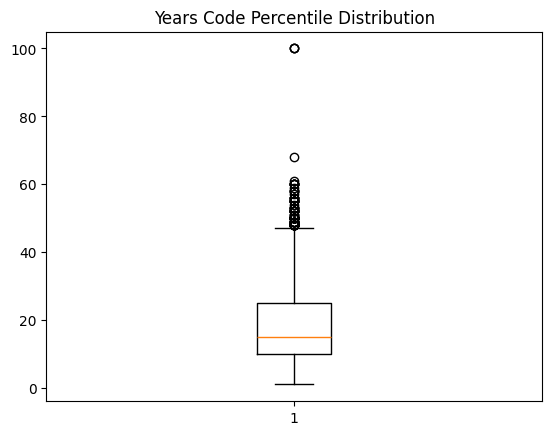

In [924]:
plt.title("Years Code Percentile Distribution")
plt.boxplot(df_yc_2["YearsCode"])
plt.show()

Let's remove the outliers with the IQR (Interquartile Range)

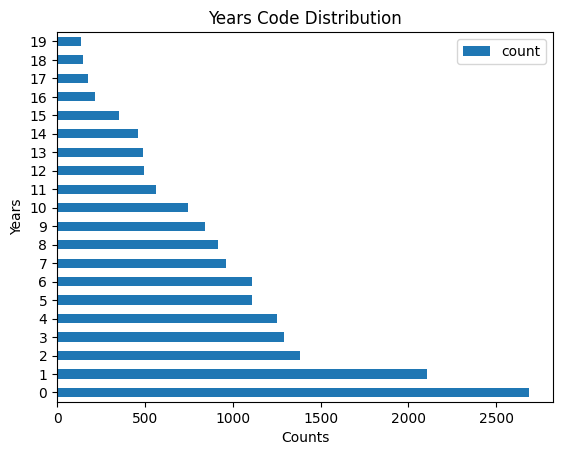

In [925]:
# Defining IQR
q1 = df_yc_2["YearsCode"].quantile(0.25)
q3 = df_yc_2["YearsCode"].quantile(0.75)
iqr = q3 - q1

# Setting limits
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Filtering dataset
df_yc_3 = df_yc_2[(df["YearsCode"] >= lower) & (df["YearsCode"] <= upper)].copy()

# Show results
df_yc_3["YearsCodeClasses"] = pd.cut(df_yc_3["YearsCode"], bins=20)
df_yc_3["YearsCodeClasses"].value_counts().reset_index().plot(
    kind="barh",
    title="Years Code Distribution",
    xlabel="Counts",
    ylabel="Years")
df_yc_3.drop(columns=["YearsCodeClasses"], axis=1, inplace=True)

Now, we'll consider `YearsCode` column cleaned.

In [926]:
# Store into final DataFrame
df_yc_final = df_yc_3.copy()

#### Cleaning `Employment` column

In [927]:
# Show info
df_empl_1 = df_yc_final.copy()
df_empl_1["Employment"].info()

<class 'pandas.core.series.Series'>
Index: 17452 entries, 0 to 49122
Series name: Employment
Non-Null Count  Dtype 
--------------  ----- 
17452 non-null  object
dtypes: object(1)
memory usage: 272.7+ KB


No null values. We'll turn the attention to the distribution.

In [928]:
df_empl_1["Employment"].value_counts()

Employment
Employed                                                14893
Independent contractor, freelancer, or self-employed     2176
Student                                                   328
Not employed                                               45
Retired                                                    10
Name: count, dtype: int64

The column is dominated by `Employed` value. This variable could undermine the model fit. For now, we'll keep this variable, but only the top 3 values.

In [929]:
# Defining values to keep
values_to_keep = ["Employed",
                  "Independent contractor, freelancer, or self-employed",
                  "Student"]

# Filtering dataset
df_empl_2 = df_empl_1[df_empl_1["Employment"].isin(values_to_keep)].copy()

# Show results
df_empl_2["Employment"].value_counts()

Employment
Employed                                                14893
Independent contractor, freelancer, or self-employed     2176
Student                                                   328
Name: count, dtype: int64

Now, we'll consider `Employment` column cleaned.

In [930]:
# Store it into final DataFrame
df_cleaned = df_empl_2.copy()

---

## Attributes Transformation

### Transforming multi-label columns

In [931]:
df_mlc_1 = df_cleaned.copy()

cols_multi = [
    "LanguageHaveWorkedWith",
    "DatabaseHaveWorkedWith",
    "PlatformHaveWorkedWith",
    "WebframeHaveWorkedWith",
]

for col in cols_multi:

    # Série com listas → explode (cada tecnologia vira uma linha separada)
    s = df_mlc_1[col].explode()  # index repetido para cada item da lista

    # One-hot em cima dos valores explodidos
    dummies = pd.get_dummies(s)
    # dummies tem index igual ao do df original (repetido), e colunas = tecnologias

    # Reagrupar por linha original (index) pegando o máximo (0/1)
    dummies = dummies.groupby(level=0).max()

    # Adicionar prefixo com o nome da coluna original
    # (mantendo os nomes das tecnologias *exatamente* como estão, com espaços)
    dummies = dummies.add_prefix(f"{col}__")

    # Juntar no df_mlc_1 e remover a coluna original de listas
    df_mlc_1 = pd.concat([df_mlc_1.drop(columns=[col]), dummies], axis=1)

df_mlc_1.head()

,Age,MainBranch,RemoteWork,Industry,OrgSize,AIAgents,Country,DevType,EdLevel,YearsCode,...,WebframeHaveWorkedWith__Nuxt.js,WebframeHaveWorkedWith__Phoenix,WebframeHaveWorkedWith__React,WebframeHaveWorkedWith__Ruby on Rails,WebframeHaveWorkedWith__Spring Boot,WebframeHaveWorkedWith__Svelte,WebframeHaveWorkedWith__Symfony,WebframeHaveWorkedWith__Vue.js,WebframeHaveWorkedWith__WordPress,WebframeHaveWorkedWith__jQuery
0,25-34 years old,I am a developer by profession,Remote,Fintech,20 to 99 employees,"Yes, I use AI agents at work monthly or infreq...",Ukraine,"Developer, mobile",Master’s degree,14.0,...,False,False,False,False,False,False,False,False,False,False
1,25-34 years old,I am a developer by profession,"Hybrid (some in-person, leans heavy to flexibi...",Retail and Consumer Services,500 to 999 employees,"No, and I don't plan to",Netherlands,"Developer, back-end",Less than Bachelor’s,10.0,...,False,False,False,False,True,False,False,False,False,False
2,35-44 years old,I am a developer by profession,NaN,Software Development,Unkown,"Yes, I use AI agents at work weekly",Ukraine,"Developer, front-end",Bachelor’s degree,12.0,...,False,False,True,False,False,False,False,False,False,False
3,35-44 years old,I am a developer by profession,Remote,Retail and Consumer Services,"10,000 or more employees","Yes, I use AI agents at work monthly or infreq...",Ukraine,"Developer, back-end",Bachelor’s degree,5.0,...,False,False,False,False,True,False,False,False,False,False
4,35-44 years old,I am a developer by profession,NaN,Software Development,Unkown,"No, and I don't plan to",Ukraine,Engineering manager,Master’s degree,22.0,...,False,False,False,False,False,False,False,False,False,True


---

## Export Processed Dataset

In [932]:
df_transformed = df_mlc_1.copy()
df_transformed.to_csv("../data/training/dataset.csv",
                  sep=",",
                  index=False)